In [1]:
import pandas as pd
import numpy as np

from datetime import datetime

%matplotlib inline
pd.set_option('display.max_rows', 500)

In [2]:
data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv(data_path)

<AxesSubplot:xlabel='date'>

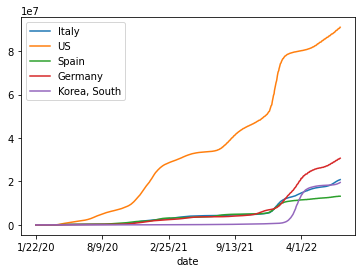

In [4]:
time_idx=pd_raw.columns[4:]
df_plot = pd.DataFrame({
    'date':time_idx})
df_plot.head()
pd_raw[pd_raw['Country/Region']=='Germany'].iloc[:,4::].sum(axis=0)[0:4]
country_list=['Italy',
              'US',
              'Spain',
              'Germany',
              'Korea, South',
             ] 

for each in country_list:
    df_plot[each]=np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))
    %matplotlib inline
df_plot.set_index('date').plot()

In [5]:
time_idx=[datetime.strptime( each,"%m/%d/%y") for each in df_plot.date] # convert to datetime
time_str=[each.strftime('%Y-%m-%d') for each in time_idx] # convert back to date ISO norm (str)
df_plot['date']=time_idx
type(df_plot['date'][0])
df_plot.to_csv('../data/processed/COVID_small_flat_table.csv',sep=';',index=False)